In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
import glob

In [11]:
import os
os.getcwd()

'C:\\Users\\Awesh\\Documents\\Jupyter Notebook Analysis'

In [15]:
#1) Join/Combine all datasets from 2017-11-01 to 2017-11-03.
files=glob.glob("*.json")

In [21]:
for i in files:
     d=pd.concat([pd.read_json(i)],axis=0)

In [223]:
d.head()

,id,link,screen_name,source,text,time,user_id,Trump_occurence
0,929946496115642368,https://www.twitter.com/EmergeAmerica/statuses...,BrendaLLawrence,Twitter for iPhone,"RT @EmergeAmerica ""Women are motivated to impr...",2017-11-13T00:38:16-05:00,54300515,False
1,929938091992784896,https://www.twitter.com/RepRickLarsen/statuses...,RepRickLarsen,Twitter for Android,"The thing is, everyone knows she is coming and...",2017-11-13T00:04:53-05:00,404132211,False
2,929979667435618304,https://www.twitter.com/Breaking911/statuses/9...,auctnr1,Twitter for iPhone,RT @Breaking911 JUST IN: Suspect In 'Mall of A...,2017-11-13T02:50:05-05:00,21572351,False
3,930025645933023232,https://www.twitter.com/replouiegohmert/status...,replouiegohmert,Twitter for iPhone,Tune in at 7:15AM CT this morning! @foxandfrie...,2017-11-13T05:52:47-05:00,22055226,False
4,930041521587539968,https://www.twitter.com/CoryBooker/statuses/93...,CoryBooker,Twitter for iPhone,"â€œIn the depth of winter, I finally learned t...",2017-11-13T06:55:52-05:00,15808765,False


In [224]:
d.describe()

,id,user_id
count,2.114000e+03,2.114000e+03
mean,9.301646e+17,7.235276e+16
std,5.387187e+13,2.316683e+17
min,9.299381e+17,5.496932e+06
25%,9.301251e+17,3.419907e+07
50%,9.301659e+17,2.377504e+08
75%,9.302021e+17,1.074130e+09
max,9.302990e+17,8.289772e+17


In [24]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 7 columns):
id             2114 non-null int64
link           2114 non-null object
screen_name    2114 non-null object
source         2114 non-null object
text           2114 non-null object
time           2114 non-null object
user_id        2114 non-null int64
dtypes: int64(2), object(5)
memory usage: 115.7+ KB


In [25]:
import re

In [59]:
bool(re.search(r"\bTrump|\btrump",d.text[19]))


False

In [61]:
#2. Finding the tweet where we have trump/Trump occurence
d['Trump_occurence']=d.text.apply(lambda x: bool(re.search(r"\bTrump|\btrump|\bTRUMP",x)))

In [62]:
d.head()

,id,link,screen_name,source,text,time,user_id,Trump_occurence
0,929946496115642368,https://www.twitter.com/EmergeAmerica/statuses...,BrendaLLawrence,Twitter for iPhone,"RT @EmergeAmerica ""Women are motivated to impr...",2017-11-13T00:38:16-05:00,54300515,False
1,929938091992784896,https://www.twitter.com/RepRickLarsen/statuses...,RepRickLarsen,Twitter for Android,"The thing is, everyone knows she is coming and...",2017-11-13T00:04:53-05:00,404132211,False
2,929979667435618304,https://www.twitter.com/Breaking911/statuses/9...,auctnr1,Twitter for iPhone,RT @Breaking911 JUST IN: Suspect In 'Mall of A...,2017-11-13T02:50:05-05:00,21572351,False
3,930025645933023232,https://www.twitter.com/replouiegohmert/status...,replouiegohmert,Twitter for iPhone,Tune in at 7:15AM CT this morning! @foxandfrie...,2017-11-13T05:52:47-05:00,22055226,False
4,930041521587539968,https://www.twitter.com/CoryBooker/statuses/93...,CoryBooker,Twitter for iPhone,"â€œIn the depth of winter, I finally learned t...",2017-11-13T06:55:52-05:00,15808765,False


In [68]:
#filtering the data where there is trump in the text/tweet
trump_disc=d[d.Trump_occurence == True].reset_index(drop=True)

In [69]:
trump_disc.head()

,id,link,screen_name,source,text,time,user_id,Trump_occurence
0,930039866691391488,https://www.twitter.com/TomFitton/statuses/930...,auctnr1,Twitter for iPhone,RT @TomFitton Former Trump aides frustrated by...,2017-11-13T06:49:18-05:00,21572351,True
1,930037140838408192,https://www.twitter.com/JohnCornyn/statuses/93...,JohnCornyn,Twitter Web Client,Trump backs U.S. intelligence agencies when as...,2017-11-13T06:38:28-05:00,13218102,True
2,930031717443952640,https://www.twitter.com/JohnCornyn/statuses/93...,JohnCornyn,Twitter Web Client,The biggest threat to the Trump economy is his...,2017-11-13T06:16:55-05:00,13218102,True
3,930068395046862848,https://www.twitter.com/RepDonBeyer/statuses/9...,RepDonBeyer,Twitter for iPhone,RT @RepDonBeyer The Richest One Percent of Ame...,2017-11-13T08:42:39-05:00,2962868158,True
4,930066676074405888,https://www.twitter.com/jacobsoboroff/statuses...,RepAlGreen,Twitter for iPhone,RT @jacobsoboroff .@RepAlGreen wants to impeac...,2017-11-13T08:35:50-05:00,156333623,True


In [73]:
#Generate % of accounts tweeting about Donald Trump of the total data.
#Approach --> Lets see if we have unique user_id or not to generate the actual % of accounts tweeting about the Donand Trump
d.user_id.nunique()

534

In [74]:
len(d)

2114

In [75]:
trump_disc.user_id.nunique()

87

In [77]:
#if we generate % of unique accounts tweeting about Donald Trump of the total unique accounts then we have
(trump_disc.user_id.nunique()/d.user_id.nunique())*100

16.292134831460675

In [79]:
#If we generate % of accounts tweeting about the Donald Trump of the total data then:
(len(trump_disc)/len(d)) *100

8.514664143803216

In [91]:
#Way 1: Order accounts by the frequency of tweets about Donald Trump.
frequency=trump_disc.groupby("user_id").sum().drop("id",axis=1)
frequency.sort_values(by="Trump_occurence",ascending=False)

,Trump_occurence
user_id,
156333623,12.0
242555999,10.0
584912320,10.0
814179031956488192,7.0
2962868158,6.0
17494010,5.0
334894942,4.0
21572351,4.0
24913074,4.0


In [92]:
#way 2: Order accounts by the frequency of tweets about Donald Trump.
trump_disc.user_id.value_counts()

156333623             12
242555999             10
584912320             10
814179031956488192     7
2962868158             6
17494010               5
21572351               4
334894942              4
21406834               4
21059255               4
24913074               4
278124059              3
153944899              3
231108733              3
135623073              3
815733290955112448     3
23593446               3
247334603              2
29201047               2
24195214               2
73238146               2
239949176              2
93965901               2
946549322              2
29501253               2
158470209              2
242836537              2
13218102               2
122174004              2
242426145              2
                      ..
2966570782             1
2970462034             1
1134292500             1
963480595              1
1410590874             1
76456274               1
154139987              1
41445718               1
72198806               1


In [163]:
#Find % of Donald Trump tweets which are positive in nature. (positive keywords - Good, very good, nice. We leave it to you to add more positive keywords. )

from textblob import TextBlob
import re

def text_cleaner(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

def sentiment_analyzer(text):
    analysis = TextBlob(text_cleaner(text))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
# We create a column with the result of the analysis:
trump_disc['Score'] = np.array([ sentiment_analyzer(text) for text in trump_disc['text'] ])
pos_tweets = [ text for ix, text in enumerate(trump_disc['text']) if trump_disc['Score'][ix] > 0]

# We print percentages: if we want to see the percentages with in the trump contained texts dataframe
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(trump_disc['text'])))




Percentage of positive tweets: 57.22222222222222%


In [107]:
pos_score_analysis=trump_disc[trump_disc.Score > 0].groupby("user_id")

In [112]:
#There are no account with more than 50% positive tweets, because the id 156333623 is having 11.65% positive tweets which is max out of positive tweets count
(trump_disc[trump_disc.Score > 0].user_id.value_counts())/len(trump_disc[trump_disc.Score > 0])*100

156333623             11.650485
584912320              6.796117
814179031956488192     4.854369
242555999              3.883495
17494010               3.883495
24913074               3.883495
815733290955112448     2.912621
21059255               1.941748
158470209              1.941748
2962868158             1.941748
231108733              1.941748
486694111              1.941748
235373000              1.941748
242426145              1.941748
135623073              1.941748
334894942              1.941748
24195214               1.941748
29442313               1.941748
153944899              1.941748
73238146               1.941748
247334603              1.941748
1009269193             0.970874
18137749               0.970874
18695134               0.970874
1074518754             0.970874
293131808              0.970874
2966570782             0.970874
33530012               0.970874
22812754               0.970874
72198806               0.970874
21406834               0.970874
28602948

In [119]:
#tried Q7 but unable to understand the question properly
trump_disc.time=pd.to_datetime(trump_disc.time)

In [133]:
[trump_disc.time.apply(lambda x: x.hour),trump_disc.time.apply(lambda x: x.date)]

[0      11
 1      11
 2      11
 3      13
 4      13
 5      13
 6      13
 7      14
 8      14
 9      14
 10     14
 11     14
 12     14
 13     14
 14     14
 15     14
 16     15
 17     15
 18     15
 19     17
 20     17
 21     16
 22     16
 23     16
 24     16
 25     16
 26     16
 27     16
 28     16
 29     16
        ..
 150     1
 151     1
 152     1
 153     1
 154     1
 155     1
 156     1
 157     1
 158     1
 159     1
 160     2
 161     2
 162     2
 163     2
 164     2
 165     2
 166     2
 167     2
 168     2
 169     2
 170     2
 171     2
 172     2
 173     3
 174     3
 175     3
 176     3
 177     4
 178     4
 179     4
 Name: time, Length: 180, dtype: int64,
 0      <built-in method date of Timestamp object at 0...
 1      <built-in method date of Timestamp object at 0...
 2      <built-in method date of Timestamp object at 0...
 3      <built-in method date of Timestamp object at 0...
 4      <built-in method date of Timestamp object at 0...

In [179]:
trump_disc['hour']=trump_disc.time.apply(lambda x: x.hour)

In [180]:
trump_disc.head()

,id,link,screen_name,source,text,time,user_id,Trump_occurence,Score,hour
0,930039866691391488,https://www.twitter.com/TomFitton/statuses/930...,auctnr1,Twitter for iPhone,RT @TomFitton Former Trump aides frustrated by...,2017-11-13 11:49:18,21572351,True,-1,11
1,930037140838408192,https://www.twitter.com/JohnCornyn/statuses/93...,JohnCornyn,Twitter Web Client,Trump backs U.S. intelligence agencies when as...,2017-11-13 11:38:28,13218102,True,0,11
2,930031717443952640,https://www.twitter.com/JohnCornyn/statuses/93...,JohnCornyn,Twitter Web Client,The biggest threat to the Trump economy is his...,2017-11-13 11:16:55,13218102,True,0,11
3,930068395046862848,https://www.twitter.com/RepDonBeyer/statuses/9...,RepDonBeyer,Twitter for iPhone,RT @RepDonBeyer The Richest One Percent of Ame...,2017-11-13 13:42:39,2962868158,True,-1,13
4,930066676074405888,https://www.twitter.com/jacobsoboroff/statuses...,RepAlGreen,Twitter for iPhone,RT @jacobsoboroff .@RepAlGreen wants to impeac...,2017-11-13 13:35:50,156333623,True,1,13


In [190]:
trm_hr=trump_disc.groupby("hour")

C:\Users\Awesh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


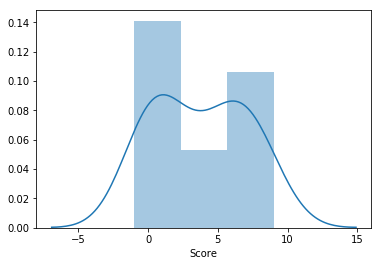

In [210]:
sns.distplot(trm_hr["Score"].sum())

In [211]:
trm_score_hour=trump_disc.groupby(["hour","Score"])
#more number of negative tweets 

In [218]:
trump_disc["sentiment"] = trump_disc.Score.apply(lambda x: "pos" if x == 1 else "neu" if x == 0  else "neg")

In [220]:
trm_sc=trump_disc.groupby(["hour"])

In [222]:
trm_sc["sentiment"].value_counts()

hour  sentiment
0     pos           8
      neu           3
      neg           1
1     pos           6
      neg           5
2     pos           6
      neg           5
      neu           3
3     neg           2
      pos           2
4     pos           2
      neu           1
11    neu           2
      neg           1
13    neu           2
      neg           1
      pos           1
14    pos           6
      neu           3
15    neu           3
16    pos           4
      neu           3
      neg           2
17    pos          13
      neg           4
      neu           3
18    pos          10
      neg           2
      neu           2
19    pos          10
      neg           3
      neu           1
20    pos           6
      neg           1
      neu           1
21    pos          11
      neg           6
      neu           5
22    pos           8
      neg           4
      neu           4
23    pos          10
      neg           3
      neu           1
Name: sentiment,

### BEING HONEST I DIDN'T UNDERSTOOD THE LAST TWO QUESTIONS STILL I AM TRYING TO SOLVE IT AND AFTER SOLVING IT I WILL UPDATE HERE AND MAIL YOU BACK